In [12]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pickle
import scipy.stats
from tqdm import tqdm_notebook

In [2]:
%matplotlib inline
font={'family': 'Times New Roman',
      'size': 10}
plt.rc('font', **font)
matplotlib.rcParams['figure.facecolor'] = (1,1,1,1)

In [3]:
#data_path = '/scratch/gpfs/jabbate/data_60_ms_randomized_flattop/train.pkl'
data_path = '/home/fouriest/SCHOOL/Princeton/PPPL/train.pkl'
with open(data_path,'rb') as f:
    data = pickle.load(f, encoding='latin1')


In [6]:
metric_functions = {'mean': np.mean,
                    'median': np.median,
                    'std': np.std,
                    'variance': np.var,
                    'iqr': lambda x,axis: np.subtract(*np.percentile(x, [75, 25], axis=axis)),
                    'skewness': scipy.stats.skew,
                    'kurtosis': scipy.stats.kurtosis}
actuators = ['pinj','curr','tinj','gasA']


In [14]:
params = {}
for key, value in tqdm_notebook(data.items(), position=0):
    for metric, fn in tqdm_notebook(metric_functions.items(),leave=False, position=1):
        params[key + '-' + metric] = fn(value, axis=-1).flatten()

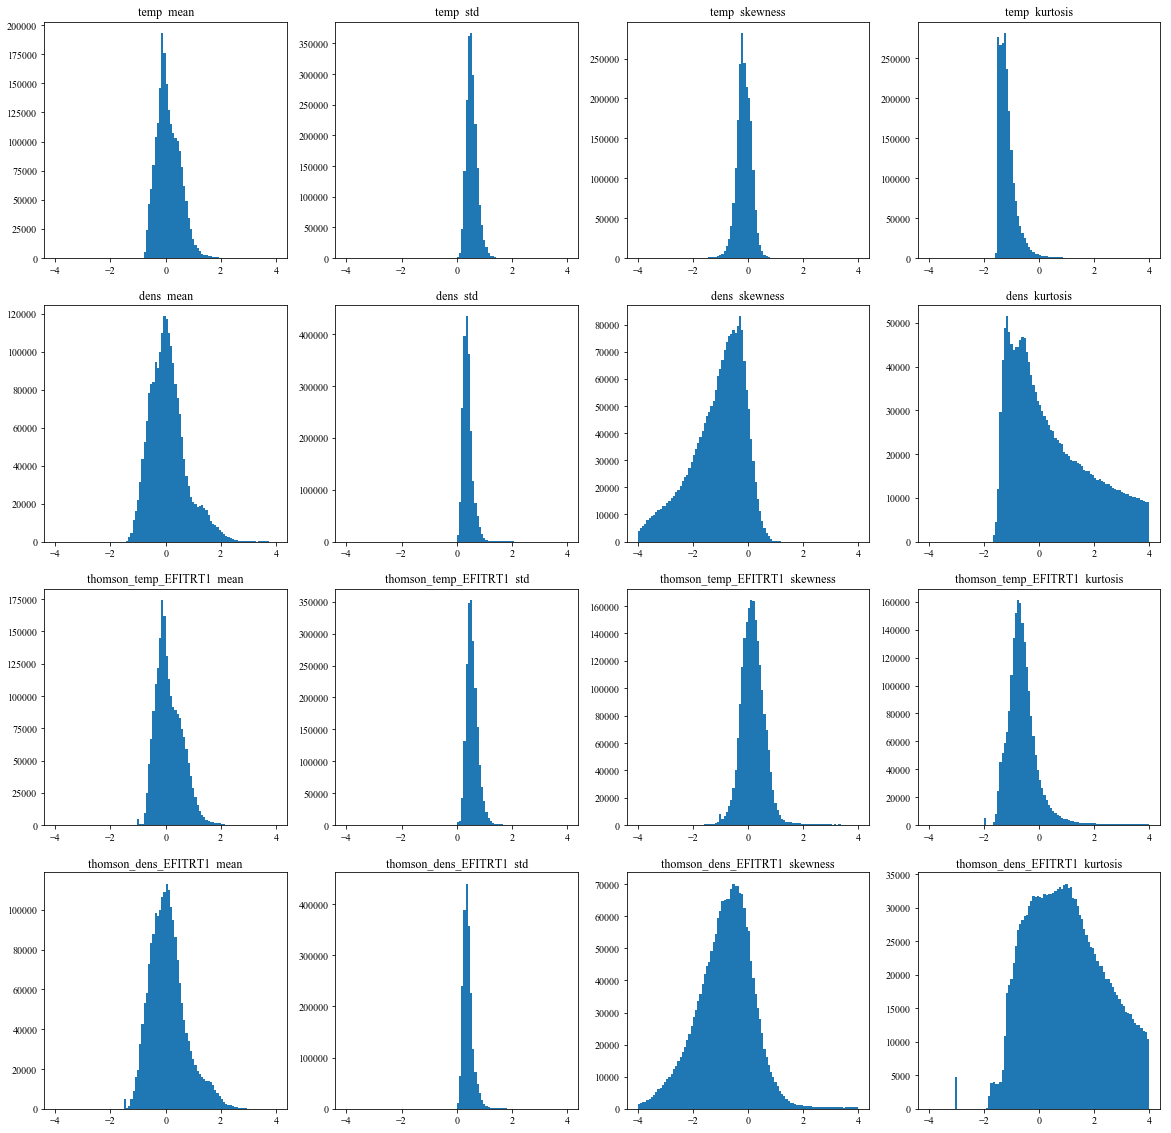

In [16]:
metrics = ['mean','std','skewness','kurtosis']
profiles = ['temp','dens','thomson_temp_EFITRT1','thomson_dens_EFITRT1']

nrows = len(profiles)
ncols = len(metrics)
figsize = (ncols*5,nrows*5)
bins=100
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
for i, sig in tqdm_notebook(enumerate(profiles)):
    for j, metric in tqdm_notebook(enumerate(metrics), leave=False):
        ax[i,j].hist(params[sig + '-' + metric], bins=bins, range=[-4,4])
        ax[i,j].title.set_text(sig + '  ' + metric)



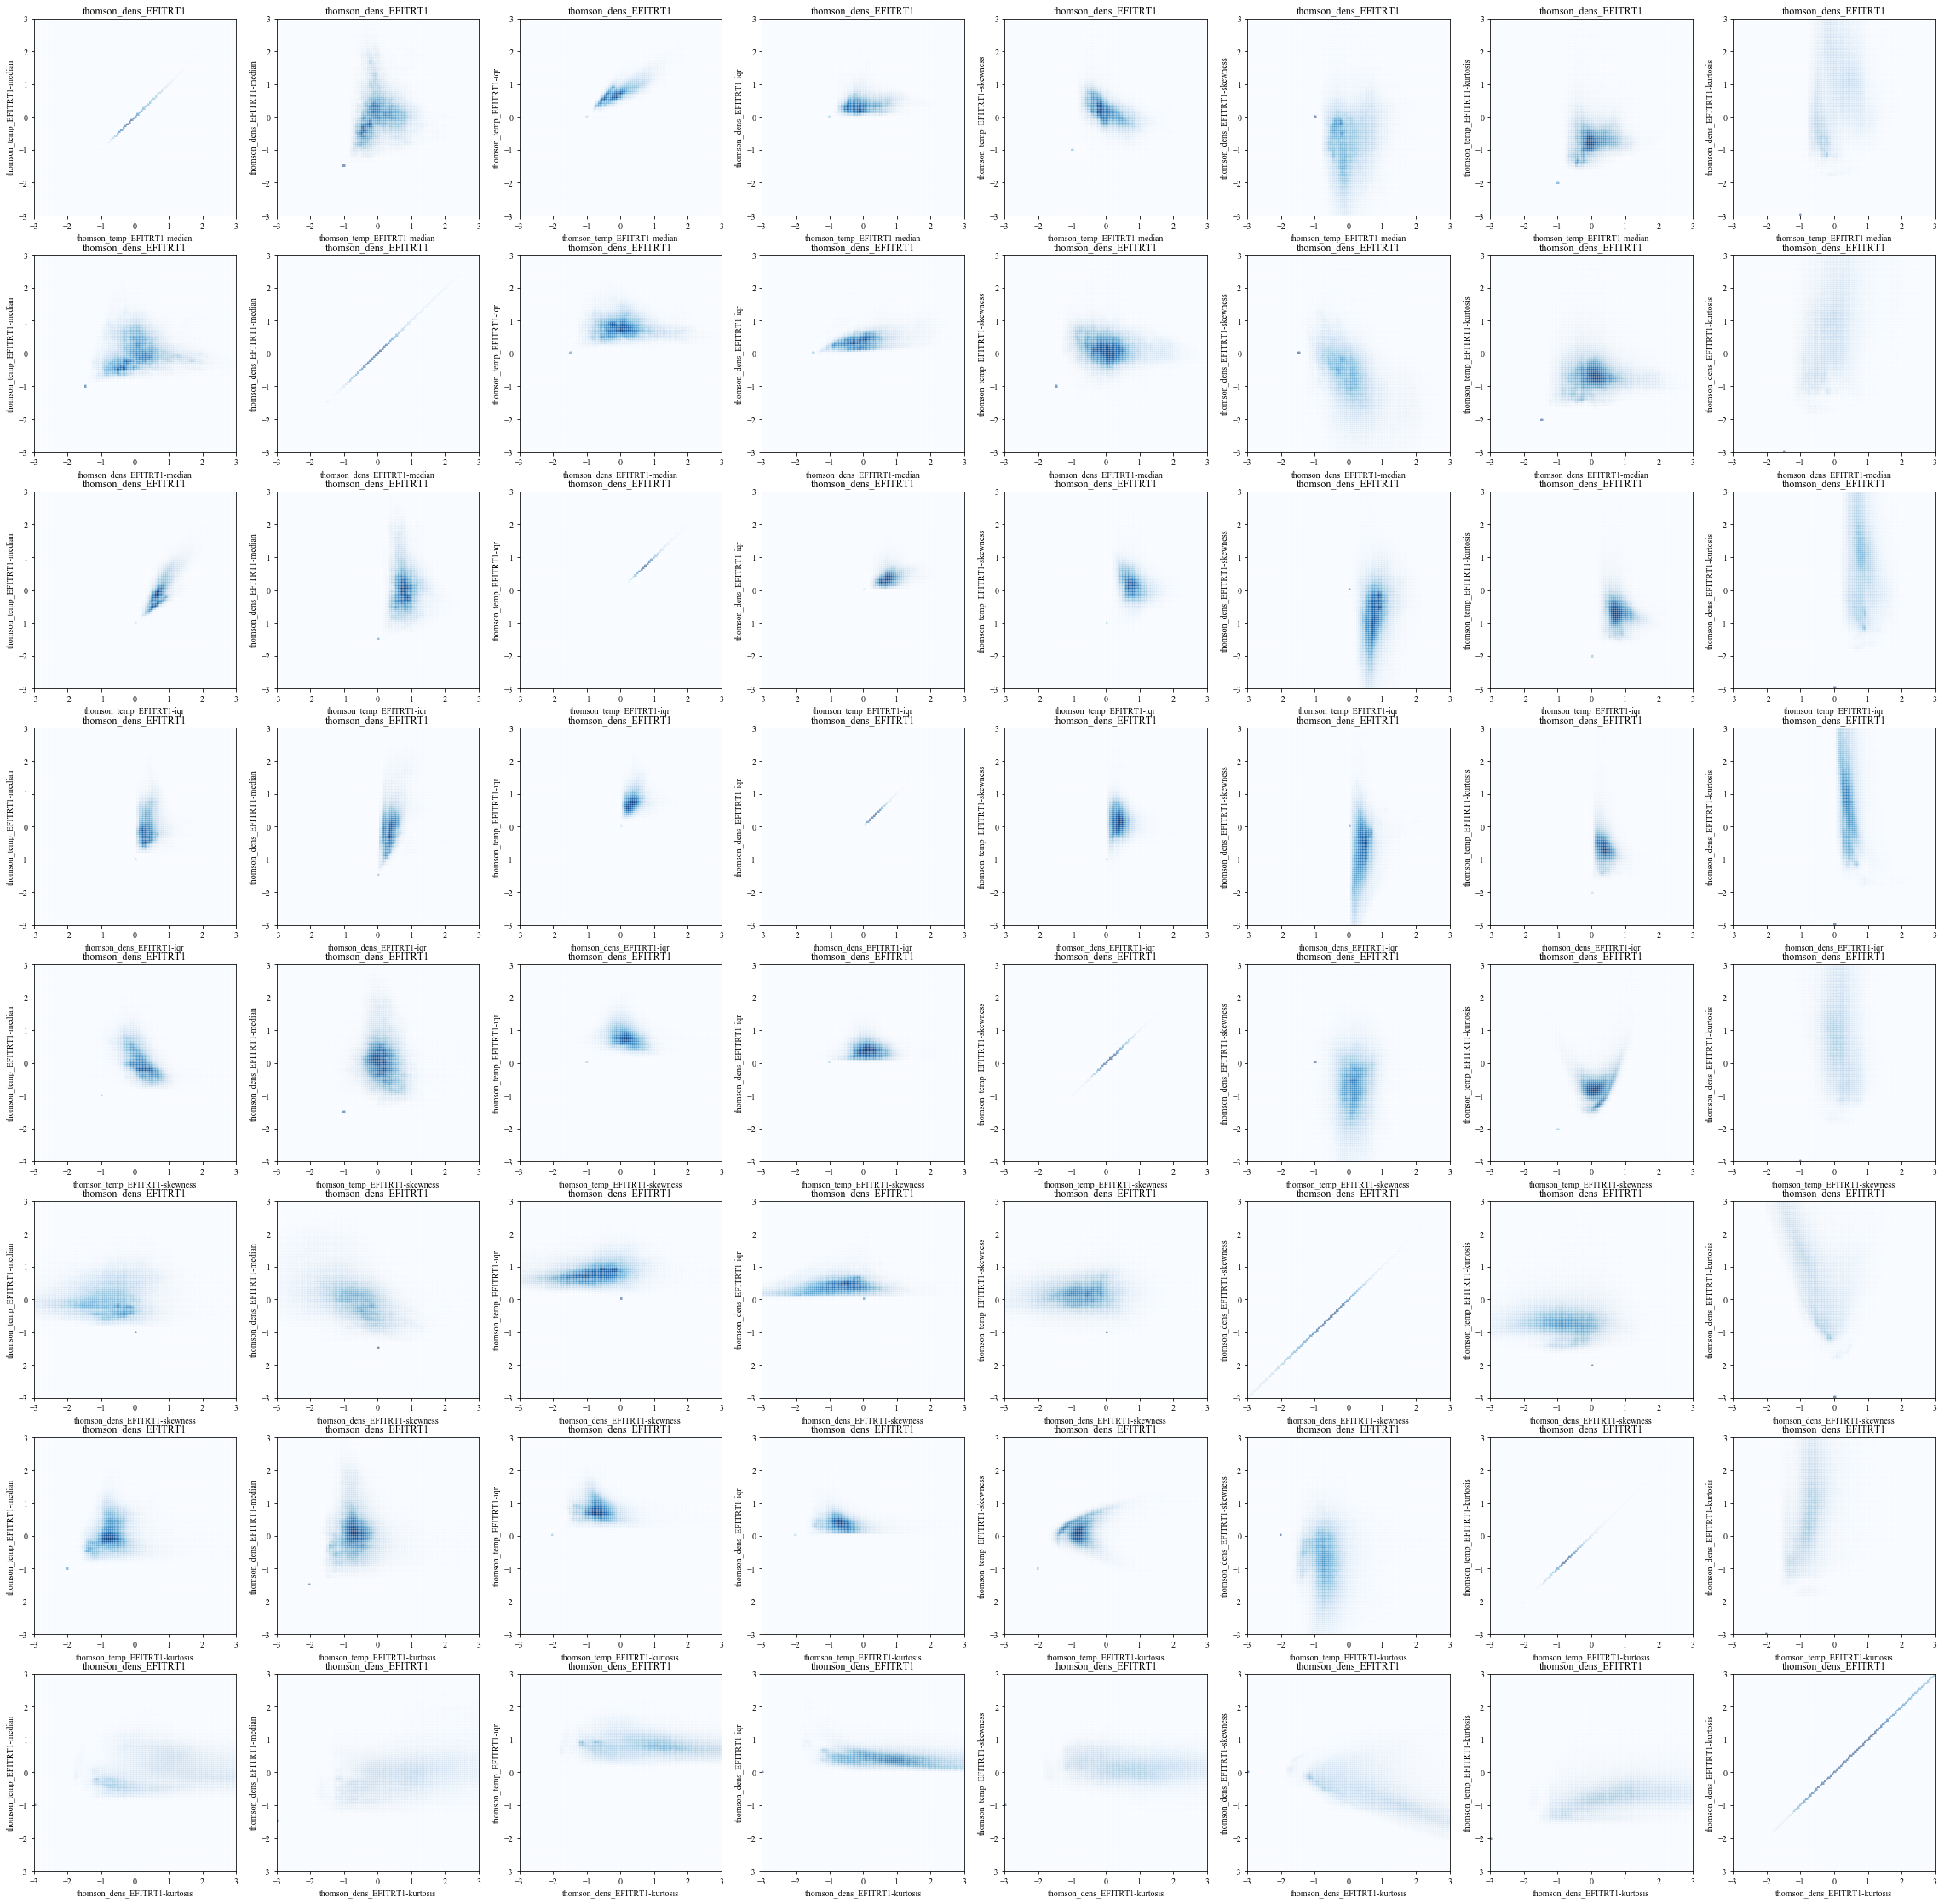

In [20]:
metrics = ['median','iqr','skewness','kurtosis']
profiles = ['thomson_temp_EFITRT1','thomson_dens_EFITRT1']
labels = [profile + '-' +  metric for metric in metrics for profile in profiles]

nrows = len(labels)
ncols = len(labels)
figsize = (ncols*5,nrows*5)
bins=100
alpha = .5
xrange = [-3,3]
yrange = [-3,3]
cmap = 'Blues'
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
for i, label1 in tqdm_notebook(enumerate(labels)):
    for j, label2 in tqdm_notebook(enumerate(labels), leave=False): 
            ax[i,j].hist2d(params[label1], params[label2], bins=bins, cmap=cmap, alpha=alpha, range = [xrange,yrange])
            ax[i,j].title.set_text(sig)
            ax[i,j].set_xlabel(label1)
            ax[i,j].set_ylabel(label2)
            ax[i,j].set_xlim(xrange)
            ax[i,j].set_ylim(yrange)



In [22]:
data['pinj'].shape

(512669, 9)